In [1]:
import matplotlib.pyplot as plt
import nest
import numpy

nest.ResetKernel()


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.8.0-post0.dev0
 Built: Jul 13 2025 01:06:24

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



In [2]:
nest.resolution = 0.05

neuron = nest.Create("hh_psc_alpha_gap", 2)

vm = nest.Create("voltmeter", params={"interval": 0.1})


Jul 15 20:01:27 SimulationManager::set_status [Info]: 
    Temporal resolution changed from 0.1 to 0.05 ms.


In [3]:
neuron.I_e = 100.0
neuron[0].V_m = -10.0

nest.Connect(vm, neuron, "all_to_all")


In [4]:
# nest.Connect(
#     neuron, neuron, {"rule": "all_to_all", "allow_autapses": False}, {"synapse_model": "gap_junction", "weight": 0.5}
# )


Jul 15 20:01:27 NodeManager::prepare_nodes [Info]: 
    Preparing 3 nodes for simulation. 2 of them use iterative solution 
    techniques.

Jul 15 20:01:27 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 3
    Simulation time (ms): 351
    Number of OpenMP threads: 1
    Number of MPI processes: 1

Jul 15 20:01:27 SimulationManager::run [Info]: 
    Simulation finished.


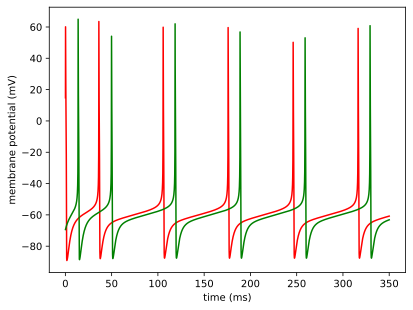

In [5]:
nest.Simulate(351.0)

senders = vm.events["senders"]
times = vm.events["times"]
v_m_values = vm.events["V_m"]

plt.figure(1)
plt.plot(times[numpy.where(senders == 1)], v_m_values[numpy.where(senders == 1)], "r-")
plt.plot(times[numpy.where(senders == 2)], v_m_values[numpy.where(senders == 2)], "g-")
plt.xlabel("time (ms)")
plt.ylabel("membrane potential (mV)")
plt.show()